In [12]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew 
from scipy.special import boxcox1p
#inv - inv_boxcox1p(y, 2.5)

In [13]:
df = pd.read_csv('housing.data', sep='\s+', header=None, names=['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

    1. CRIM      per capita crime rate by town
    
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
                 
    3. INDUS     proportion of non-retail business acres per town
    
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
                 
    5. NOX       nitric oxides concentration (parts per 10 million)
    
    6. RM        average number of rooms per dwelling
    
    7. AGE       proportion of owner-occupied units built prior to 1940
    
    8. DIS       weighted distances to five Boston employment centres
    
    9. RAD       index of accessibility to radial highways
    
    10. TAX      full-value property-tax rate per $10,000
    
    11. PTRATIO  pupil-teacher ratio by town
    
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
                 
    13. LSTAT    % lower status of the population
    
    14. MEDV     Median value of owner-occupied homes in $1000's


1. CRIM: 도시 별 1 인당 범죄율

2. ZN: 25,000 sq.ft. 이상의 주차 구역 용 주거용 토지의 비율.

3. INDUS: 마을 당 non-retail business(t.v stations, radio stations, internet and telephone businesses, advertising campaigns) 에이커(단위) 의 비율 

4. CHAS: 찰스 리버 더미 변수 (강이 경계에 있으면 1, 그렇지 않으면 0)

5. NOX: 산화 질소 농도 (1000 만 분당)

6. RM: 주거 당 평균 객실 수

7. AGE: 1940 년 이전에 건설 된 소유주가 차지하는 비례

8. DIS: 보스턴 고용 센터 5 곳까지의 가중치

9. RAD: 방사형 고속도로 접근성 지수

10. TAX: $ 10,000 당 완전 가치 재산세 세율

11. PTRATIO: 마을 별 학생 - 교사 비율

12. B: 도시 별 흑인 비율

13. LSTAT: 인구의 낮은 지위

14. MEDV: 1000 달러짜리 주택 소유 주택의 중간 값

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Part 1. Data Exploration
- ### target
- ### features
- ### including feature engineering

## Target (house price)

In [15]:
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

There is no zero price in here.

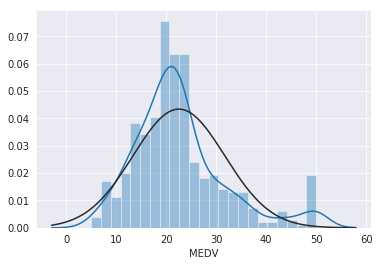

In [16]:
sns.distplot(df['MEDV'], fit=norm)

Overall, it is normally distributed. There may be some outliers with around $50,000 price houses.

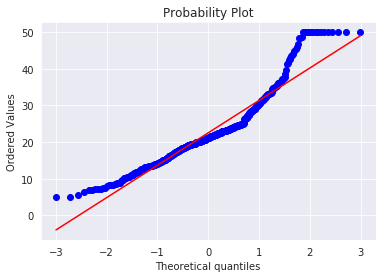

In [17]:
qq = stats.probplot(df['MEDV'], plot=plt)

In a QQ plot, It looks the target variable is skewed, so it needs transformation to make it more normally distributed.

In [18]:
# to reverse : np.expm1()
test1 = np.log1p(df['MEDV'])

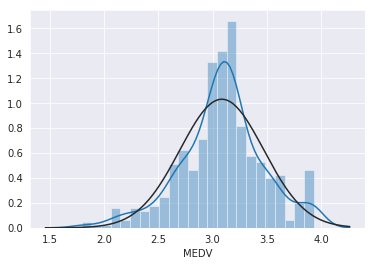

In [19]:
sns.distplot(test1 , fit=norm)

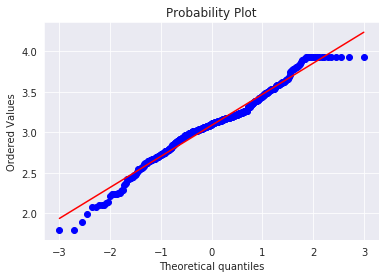

In [20]:
new_qq = stats.probplot(test1, plot=plt)

In [21]:
print(df['MEDV'].skew(), df['MEDV'].kurt())
print(test1.skew(), test1.kurt())

1.1080984082549072 1.495196944165818
-0.2412435236076338 0.6740533238972457


After log transformation, the skewness and kurtosis are decreased.

In [22]:
df['MEDV'] = np.log1p(df['MEDV'])

## Features

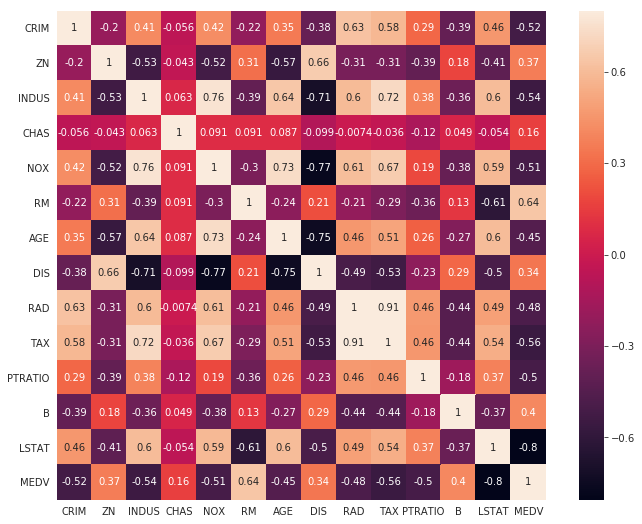

In [23]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);

It seems like 'LSTAT' and 'RM' have a strong relationship with the house prices.

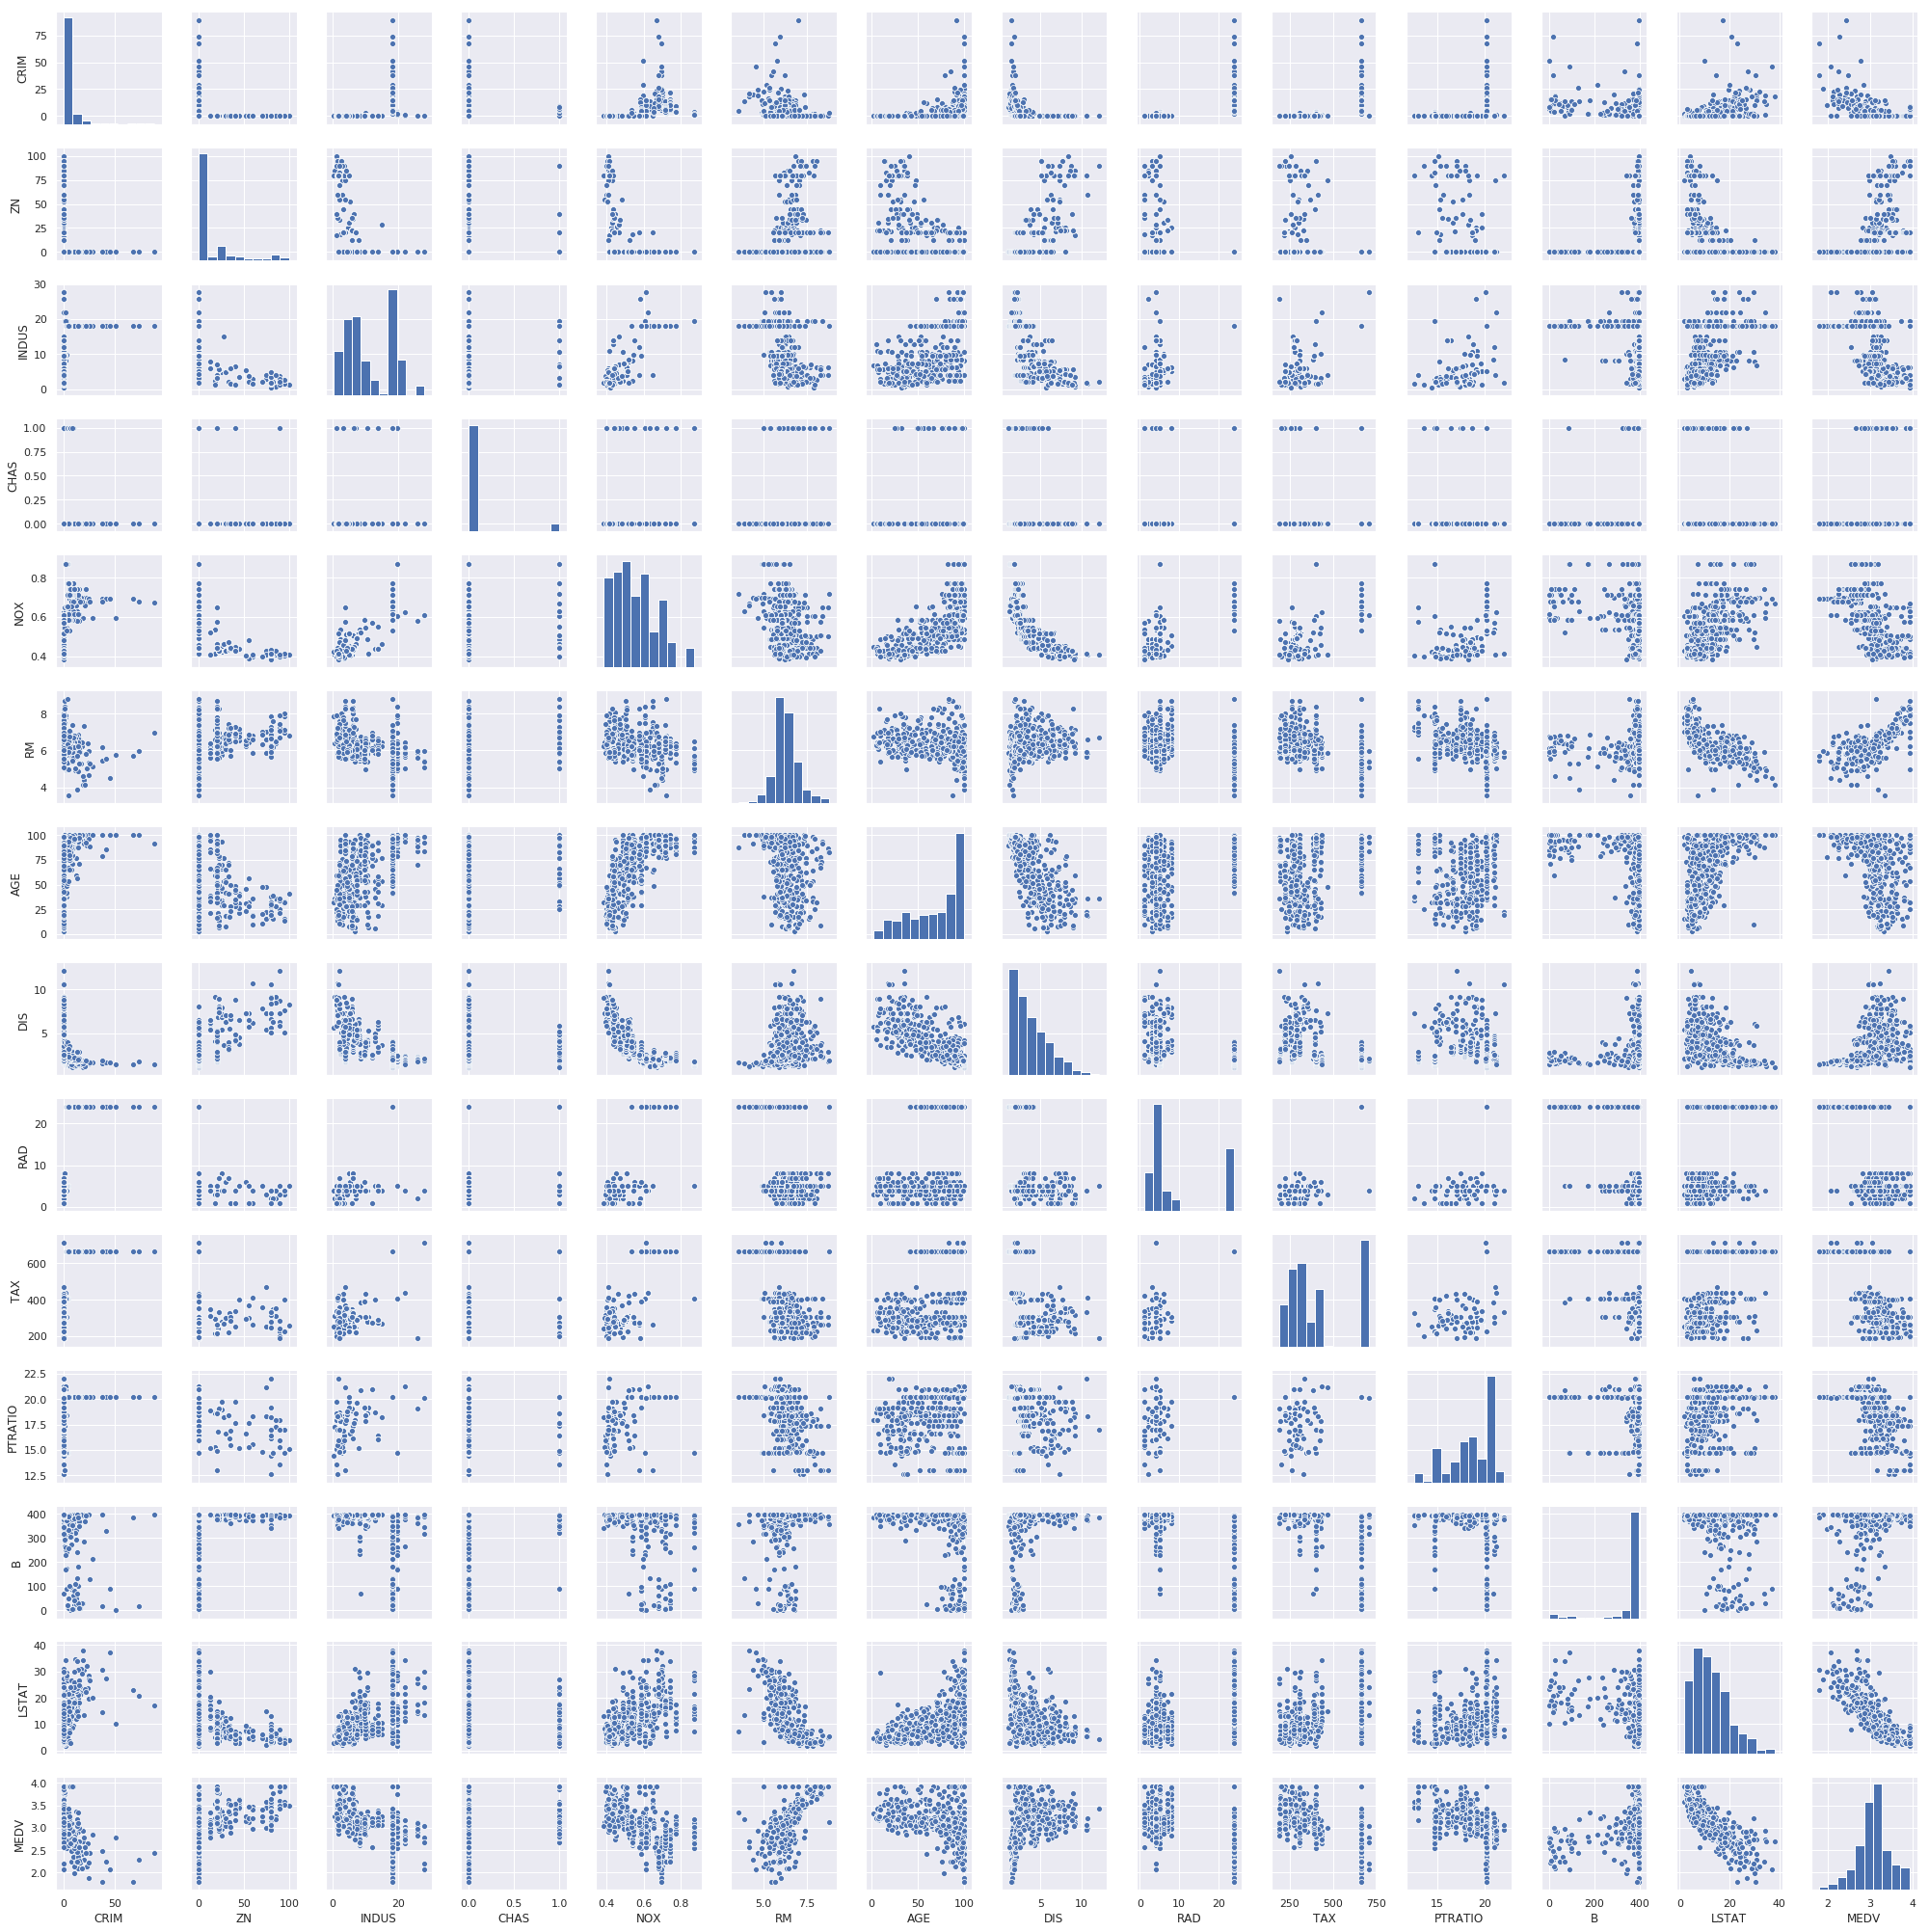

In [30]:
#sns.set()
#sns.pairplot(df,)
sns.pairplot(df, size=2.0)

In [32]:
plt.show()

In a pair plot, 'NOX' and 'ZN' got my attention. 'ZN' has linear relationship with the house price and 'NOX' also has a linear relationship with the house price('MEDV').

## Relationship with categorical features(CHAS)

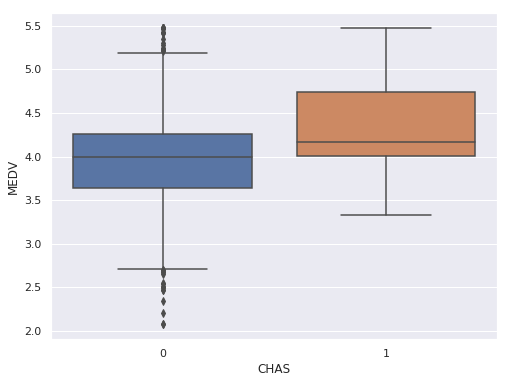

In [45]:
#box plot CHAS/MEDV
data = pd.concat([df['MEDV'], df['CHAS']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='CHAS', y='MEDV', data=data)

It seems that it is not that beautiful with our target MEDV, but I can live with that.

## Relationship with numerical features

- ### NOX(nitric oxides concentration (parts per 10 million))

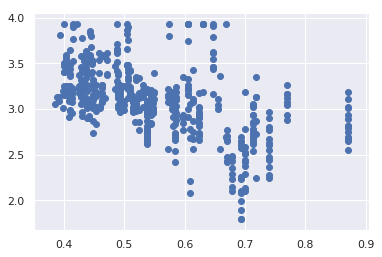

In [33]:
plt.scatter(df['NOX'], df['MEDV'])

This is scatter plot between 'NOX' and house price. It looks like it got linear relationship.

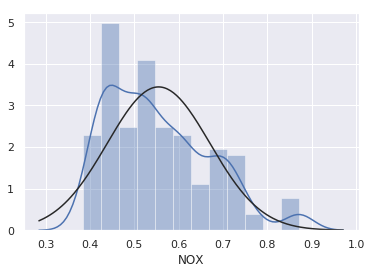

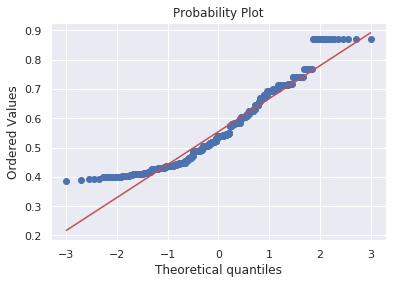

In [34]:
#histogram and normal probability plot
sns.distplot(df['NOX'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['NOX'], plot=plt)

In [40]:
test1 = np.log1p(df['NOX'])

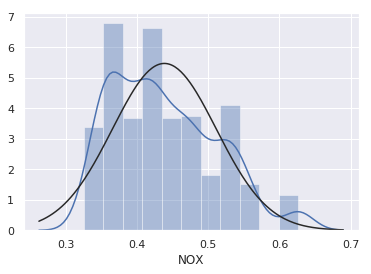

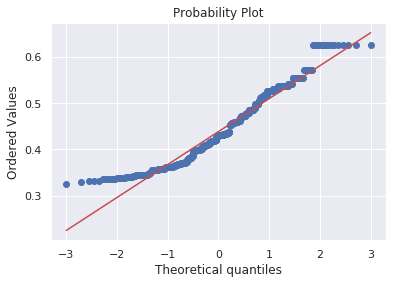

In [41]:
#histogram and normal probability plot
sns.distplot(test1, fit=norm);
fig = plt.figure()
res = stats.probplot(test1, plot=plt)

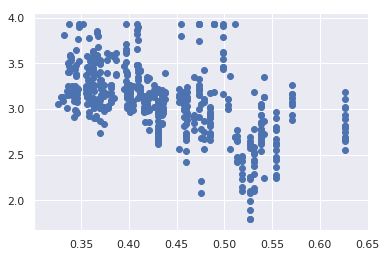

In [42]:
plt.scatter(test1, df['MEDV'])

In [43]:
print(df['NOX'].skew(), df['NOX'].kurt())
print(test1.skew(), test1.kurt())

0.7293079225348787 -0.06466713336542629
0.5843471124349947 -0.3770771732950444


After log transformation, skewness is decreased, but kurtosis is increased. Log transformation did not help to make this more normally distributed. In the last of jupyter notebook, we are going to apply different transform to make it better.

- ### ZN (proportion of residential land zoned for lots over 25,000 sq.ft.)

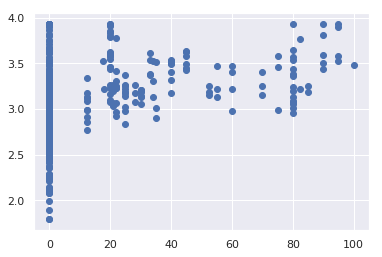

In [44]:
plt.scatter(df['ZN'], df['MEDV'])

'ZN' has some linear relationship with 'MEDV',but it has many zeros.

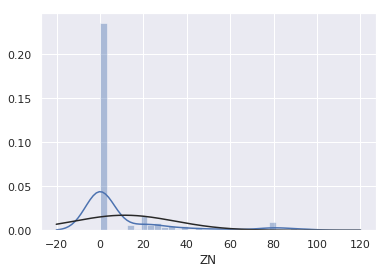

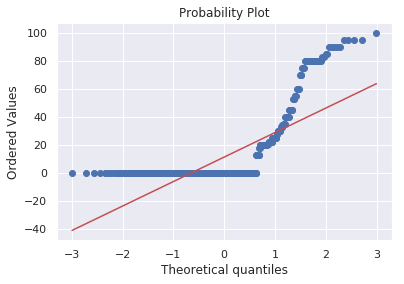

In [202]:
#histogram and normal probability plot
sns.distplot(df['ZN'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['ZN'], plot=plt)

In [203]:
df['ZN'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

As we can see, there are over 50% of zeros here, we can make is categorical values, but we don't want to lose other numerical values, so I will keep the zeros.

In [204]:
test1 = np.log1p(df['ZN'])

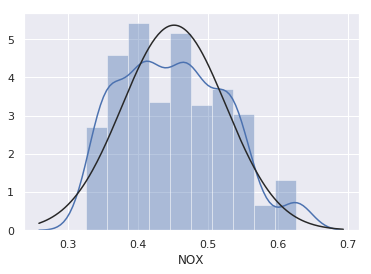

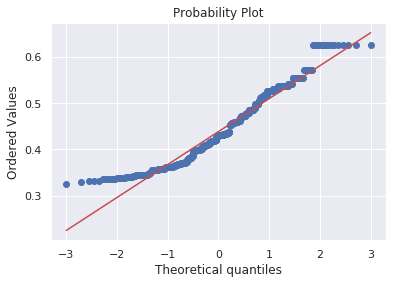

In [47]:
#histogram and normal probability plot
sns.distplot(test1[int(len(test1)/5):], fit=norm);
fig = plt.figure()
res = stats.probplot(test1, plot=plt)

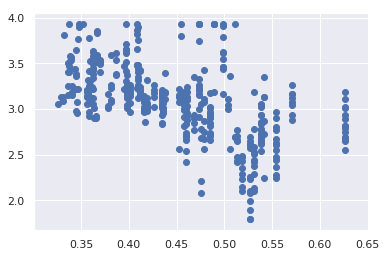

In [50]:
plt.scatter(test1[int(len(test1)/5):], df['MEDV'][int(len(test1)/5):])

After log transformation, except zeros, numerical values now have some linear relationship with the house price.

- ### RM (average number of rooms per dwelling)

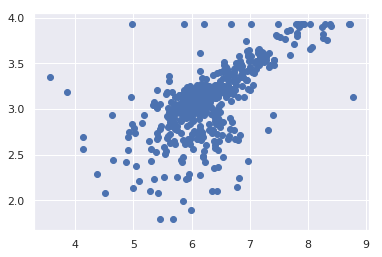

In [51]:
plt.scatter(df['RM'], df['MEDV'])

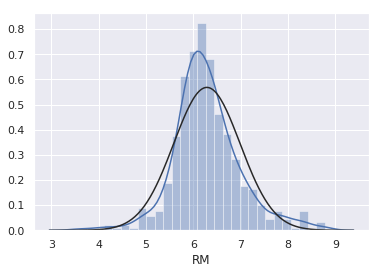

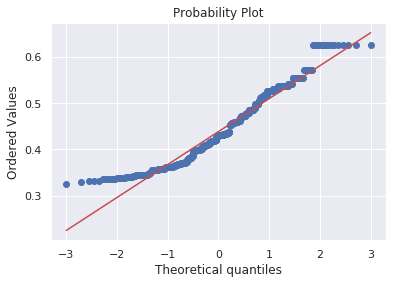

In [52]:
#histogram and normal probability plot
sns.distplot(df['RM'], fit=norm);
fig = plt.figure()
res = stats.probplot(test1, plot=plt)

In [53]:
test1 = np.log1p(df['RM'])

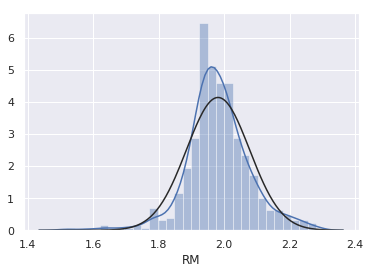

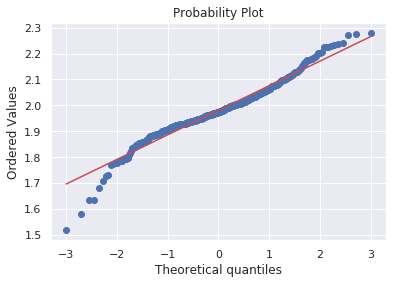

In [54]:
#histogram and normal probability plot
sns.distplot(test1, fit=norm);
fig = plt.figure()
res = stats.probplot(test1, plot=plt)

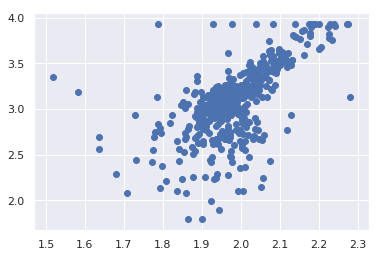

In [55]:
plt.scatter(test1, df['MEDV'])

'RM' certainly has a strong relationship with the house price and it is normally distributed. After log transformation, we can see it fits more than before in a QQ plot.

- ### LSTAT   (% lower status of the population)

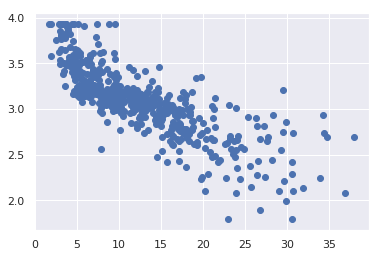

In [56]:
plt.scatter(df['LSTAT'], df['MEDV'])

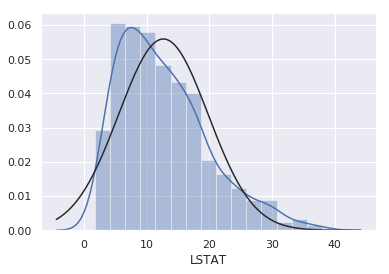

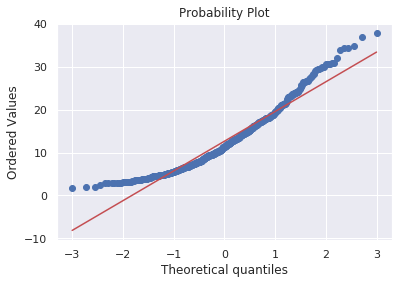

In [57]:
sns.distplot(df['LSTAT'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['LSTAT'], plot=plt)

We already have seen this strong relationship in a heatmap. As we can see, it has a strong relationship with the house price and QQ plot looks okay.

In [59]:
test1 = np.log1p(df['LSTAT'])

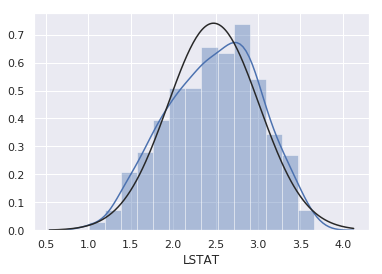

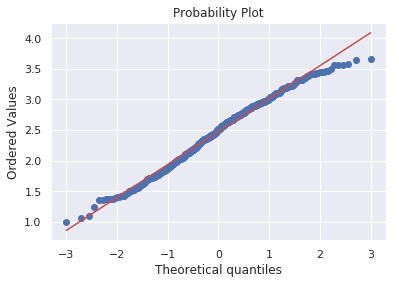

In [60]:
#histogram and normal probability plot
sns.distplot(test1, fit=norm);
fig = plt.figure()
res = stats.probplot(test1, plot=plt)

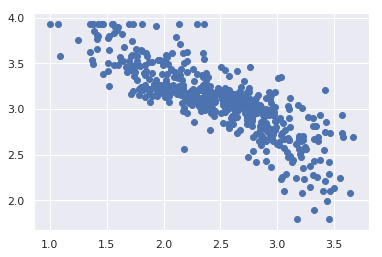

In [61]:
plt.scatter(test1, df['MEDV'])

Clearly, log transformation made 'LSTAT' more normaly distributed and got sronger relationship with the house price. 

## Feature Engineering

In our dataset, we don't have any missing values and just have one categorical value. What I can do is to apply log transformation to make our data more normally distributed, but there is another good transformation method like log named boxcox transformation. We will just pick highly skewed data and apply boxcox transformation.

In [62]:
df['MEDV'] = np.log1p(df['MEDV'])
for i in df.columns[:-1]:
    print(i)
    print(df[i].skew(), df[i].kurt())
    if i != 'CHAS' and (abs(df[i].skew()) > 0.75):
        df[i] = boxcox1p(df[i], 0.15)
        print(df[i].skew(), df[i].kurt())
    
    print('--------------------------')


CRIM
5.223148798243851 37.13050912952203
1.5087823936419944 1.6054359340291966
--------------------------
ZN
2.2256663227354307 4.031510083739155
1.2734919266490703 -0.08987364189668012
--------------------------
INDUS
0.29502156787351164 -1.2335396011495188
--------------------------
CHAS
3.405904172058746 9.638263777819526
--------------------------
NOX
0.7293079225348787 -0.06466713336542629
--------------------------
RM
0.40361213328874385 1.8915003664993404
--------------------------
AGE
-0.5989626398812962 -0.9677155941626912
--------------------------
DIS
1.0117805793009007 0.4879411222443908
0.4244094298892784 -0.7983866388790837
--------------------------
RAD
1.0048146482182057 -0.8672319936034931
0.6621327207579614 -0.9106709679989304
--------------------------
TAX
0.669955941795016 -1.1424079924768082
--------------------------
PTRATIO
-0.8023249268537809 -0.28509138330538875
-0.9715716337361822 0.12043864877940402
--------------------------
B
-2.8903737121414492 7.226817549